In [1]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Loading the data from the local file boston_train

train = np.loadtxt("./ccpp_train.csv",delimiter=",")
x = train[:,:-1]
y = train[:,-1]
x.shape

(7176, 4)

In [3]:
# Initializing scaling object

min_max_scaler_object = preprocessing.MinMaxScaler()

In [4]:
min_max_scaler_object.fit(x)
x = min_max_scaler_object.transform(x)

In [5]:
def predict(x,w,b):
    return np.dot(x,w) + b

In [6]:
def cost(x,w,b,y):
    return np.sum((y-(np.dot(x,w) + b))**2)/len(x)

In [7]:
def substep_gd(learning_rate,x,y,w,b):
    y_hat = predict(x,w,b)
    w = w + x*(learning_rate*(y-y_hat))
    b = b + learning_rate*(y-y_hat)
    return w,b

In [8]:
def step_gd(learning_rate,x,y,w,b):
    for i in range(len(x)):
        w,b = substep_gd(learning_rate,x[i],y[i],w,b)
    return w,b

In [9]:
def gd(learning_rate,num_iteration,x,y):
    w = np.ones(len(x[0]))
    b = 1
    co = np.array([])
    iteration = np.array([])
    for i in range(num_iteration):
        w,b = step_gd(learning_rate,x,y,w,b)
        c = cost(x,w,b,y)
        co = np.append(co,c)
        iteration =  np.append(iteration,i)
    return w,b,co,iteration

In [10]:
def run():
    learning_rate = 0.0001
    num_iteration = 6000
    w,b,co,iteration = gd(learning_rate,num_iteration,x,y)
    return w,b,co,iteration

In [11]:
# Loading test data

test = np.loadtxt("ccpp_test.csv",delimiter=",")
test = min_max_scaler_object.transform(test)

In [12]:
# Running the gradient algorithm and predicting results
w,b,cost,iteration = run()
test_results = predict(test,w,b)

In [13]:
# Saving the results in diabetes_results file

np.savetxt("ccpp_results.csv",test_results,delimiter=",",fmt='%1.5f')

In [14]:
test_results

array([469.93514876, 471.7456231 , 433.82482198, ..., 439.10910037,
       450.63564535, 447.24485785])

In [15]:
w

array([-67.71448475, -12.76963481,   2.36796755, -11.95041994])

(20.91, 20.915)

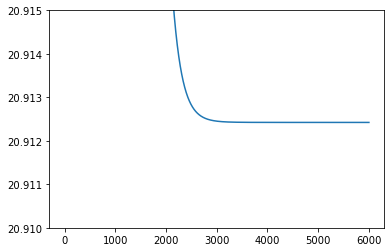

In [16]:
plt.plot(iteration,cost)
plt.ylim(20.91,20.915)

In [17]:
cost

array([10745.08638481,  2562.50157346,  2073.62083127, ...,
          20.91242311,    20.91242311,    20.91242311])

In [18]:
test_results

array([469.93514876, 471.7456231 , 433.82482198, ..., 439.10910037,
       450.63564535, 447.24485785])

In [19]:
np.where(cost == np.amin(cost))

(array([5999], dtype=int64),)

In [20]:
np.amin(cost)

20.912423105300366